In [168]:
import os
import shutil
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [169]:
#listing out the different paths and directories
zip_path = r'C:\Users/achin\SuspectTechnologies\Paintings vs Photographs.zip'
extracted_path = r'C:\Users\achin\SuspectTechnologies\Extracted'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)
#train_dir = 'dataset/train'
#test_dir = 'dataset/test'
#valid_dir = 'dataset/valid'

In [170]:
raw_data_dir = r'C:\Users\achin\SuspectTechnologies\Extracted\Raw Data'

In [171]:
assert(os.path.exists(raw_data_dir)), f"Path does not exist: {raw_data_dir}"

In [172]:
file_paths = []
labels = []


In [173]:
categories = ['painting', 'photos']
label_dict = {'painting': 0, 'photos': 1}

In [174]:
print(f"Verifying paths in {raw_data_dir}")
for category in ['painting', 'photos']:
    category_path = os.path.join(raw_data_dir, category)
    print(f"Checking path: {category_path}")
    if os.path.exists(category_path):
        print(f"Path exists: {category_path}")
        
    else:
        print(f"Path does not exist: {category_path}")

Verifying paths in C:\Users\achin\SuspectTechnologies\Extracted\Raw Data
Checking path: C:\Users\achin\SuspectTechnologies\Extracted\Raw Data\painting
Path exists: C:\Users\achin\SuspectTechnologies\Extracted\Raw Data\painting
Checking path: C:\Users\achin\SuspectTechnologies\Extracted\Raw Data\photos
Path exists: C:\Users\achin\SuspectTechnologies\Extracted\Raw Data\photos


In [175]:
for category in categories:
    category_path = os.path.join(raw_data_dir, category)
    for filename in os.listdir(category_path):
        file_path = os.path.join(category_path, filename)
        try:
            #img = load_img(file_path)  # Attempt to load the image
            file_paths.append(file_path)
            labels.append(label_dict[category])
        except Exception as e:
            print(f"Error loading image {file_path}: {e}")

In [176]:
def load_and_preprocess_img(img_path, target_size = (128, 128)):
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img)
    img_array = img_array / 255.0 #normalizing the pixel values
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [201]:
images = np.array([load_and_preprocess_img(img_path) for img_path in file_paths])
labels = np.array(labels)
labels
images

array([[[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],

         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],

         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],

         ...,

         [[1.        , 1.        , 1.        ],
          [1.        ,

In [202]:
#Split data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [203]:
from collections import Counter

In [204]:
counter = Counter(labels)
print("Distribution of images in each category:", counter)

Distribution of images in each category: Counter({1: 3747, 0: 1361})


In [205]:
def plot_images(images, labels, category_names, num_samples = 5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i])
        plt.title(category_names[labels[i]])
        plt.axis('off')
    plt.show()



category_names = {0: 'painting', 1: 'photos'}
plot_images(images, labels, category_names)

In [209]:
#Creating and Training the Model
images

array([[[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],

         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],

         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],

         ...,

         [[1.        , 1.        , 1.        ],
          [1.        ,

In [212]:
for image in images:
    image = np.squeeze(image, axis=0)

In [213]:
print(images[0].shape)

(1, 128, 128, 3)


In [208]:
print(images[212])

[[[[0.827451   0.84705883 0.8627451 ]
   [0.827451   0.84705883 0.8627451 ]
   [0.827451   0.84705883 0.8627451 ]
   ...
   [0.50980395 0.46666667 0.48235294]
   [0.5254902  0.48235294 0.49803922]
   [0.4745098  0.4392157  0.4509804 ]]

  [[0.8862745  0.8901961  0.9098039 ]
   [0.8862745  0.8901961  0.9098039 ]
   [0.8862745  0.8901961  0.9098039 ]
   ...
   [0.5254902  0.49019608 0.5019608 ]
   [0.5686275  0.52156866 0.5372549 ]
   [0.5882353  0.52156866 0.54509807]]

  [[0.8980392  0.8862745  0.9137255 ]
   [0.8980392  0.8862745  0.9137255 ]
   [0.8980392  0.8862745  0.9137255 ]
   ...
   [0.84313726 0.80784315 0.81960785]
   [0.56078434 0.49411765 0.5176471 ]
   [0.6745098  0.5921569  0.61960787]]

  ...

  [[0.50980395 0.3647059  0.33333334]
   [0.41568628 0.2784314  0.2627451 ]
   [0.6313726  0.49803922 0.49411765]
   ...
   [0.23529412 0.15686275 0.16470589]
   [0.19215687 0.10588235 0.11764706]
   [0.21176471 0.10980392 0.12156863]]

  [[0.24313726 0.16470589 0.12941177]
   [0.2

In [ ]:
print(len(images))

5108


TypeError: Invalid shape (1, 128, 128, 3) for image data

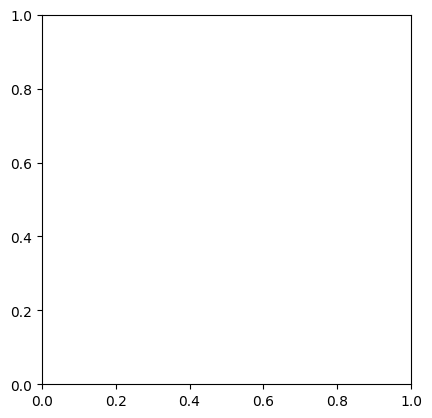

In [185]:
if len(images) > 0:
    plt.imshow(images[0])
    plt.title(f"Sample Image - {'Painting' if labels[0] == 0 else 'Photo'}")
    plt.axis('off')
    plt.show()

In [186]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


In [187]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
valid_generator = valid_datagen.flow(X_val, y_val, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)


ValueError: Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape (3575, 1, 128, 128, 3)

In [ ]:
#Building the model
from tensorflow.keras.models import Sequential


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (128, 128, 3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])

c:\Users\achin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [188]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [190]:
history = model.fit(train_generator, epochs=1, validation_data=valid_generator)

112/112 ━━━━━━━━━━━━━━━━━━━━ 29s 255ms/step - accuracy: 0.7861 - loss: 0.4819 - val_accuracy: 0.7702 - val_loss: 0.5063


In [191]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy: ', test_accuracy)
print('Test loss: ', test_loss)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7664 - loss: 0.5212
Test accuracy:  0.7679269909858704
Test loss:  0.5164209008216858


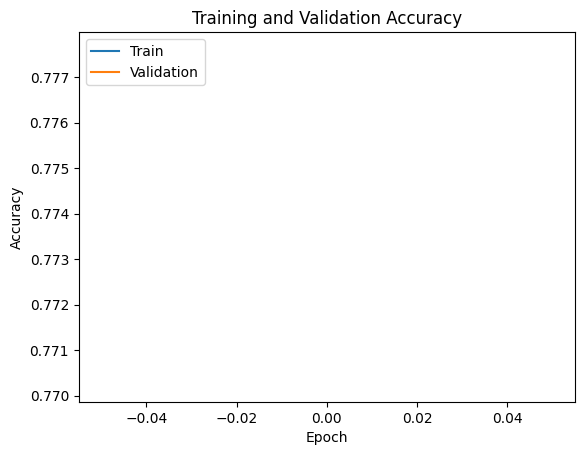

In [198]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Running it through the other files

In [193]:
def predict_image(model, image_path, target_size=(128, 128)):
    pre_processed_image = load_and_preprocess_img(image_path)
    prediction = model.predict(pre_processed_image)
    if prediction[0] > 0.5:
        return "Photo"
    else:
        return "Painting"


In [196]:
predictions = []
folder_path = r'C:\Users\achin\SuspectTechnologies\Extracted\train\painting'


In [197]:
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    prediction = predict_image(model, file_path)
    predictions.append((filename, prediction))
    print("Image:",filename, "Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image: 00200fa2c8fd5051dfa19a2e4d6ccb952ef41917.jpg Prediction: Painting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image: 003323259a6612b48df041418cdd43d24452e11b.jpg Prediction: Painting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image: 0048a3e7e27266b3ff1897ffd9a19856426b9692.jpg Prediction: Painting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Image: 00492eb1902c91569f6e55aba27c15dac4571318.jpg Prediction: Painting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image: 0082df9a20c9fb48226ec1f7b345c97e089530a7.jpg Prediction: Painting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Image: 00913006f01fa7da9d7a86e75bd9110d820fe99b.jpg Prediction: Painting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image: 01221d5bed8d60083fa1bd482ea542b13aaf9cae.jpg Prediction: Painting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image: 0126a2d1cf5d59a9d1156d6b1fc85c1da0cc7514.jpg Prediction: Painting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: 01608c9a312bdc27b92922a03befeb7042ae4d0b.jpg Prediction: Painting
1

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001B9E8C945C0>>
Traceback (most recent call last):
  File "c:\Users\achin\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 